In [1]:
# Improt dependencies
import matplotlib.pyplot as plt
import pandas as pd
from config import api_key
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
import json

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define units to get the temperature in Celsius
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

            # Note: I used pprint to review the response
            # pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | port moresby
Processing Record 5 of Set 1 | cannonvale
Processing Record 6 of Set 1 | pyu
Processing Record 7 of Set 1 | kainantu
Processing Record 8 of Set 1 | suva
Processing Record 9 of Set 1 | bani walid
Processing Record 10 of Set 1 | iquique
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | fale old settlement
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | mitsamiouli
Processing Record 20 of Set 1 | pitkyaranta
Processing Record 21 of Set 1 | la foa
Processing Record 22 of Set 1 | fort bragg
Processing Record

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,1.79,75,20,1.54,AR,1717955224
1,albany,42.6001,-73.9662,19.46,84,86,0.89,US,1717954645
2,punta arenas,-53.1500,-70.9167,2.06,80,75,1.54,CL,1717955149
3,port moresby,-9.4431,147.1797,24.29,91,13,4.26,PG,1717955226
4,cannonvale,-20.2833,148.7000,18.66,77,0,2.65,AU,1717955226


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("Output Data/cities.csv", index_label="City_ID")

# Scatter Plots

#### Latitude vs. Temperature

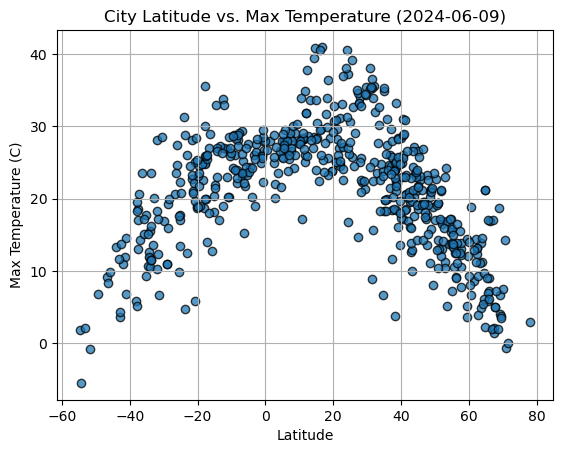

In [16]:
# Build scatter plot for latitude vs. temperature
latitude_values = city_data_df["Lat"]
temperature_values = city_data_df["Max Temp"]
Fig1 = plt.scatter(latitude_values, temperature_values, edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Humidity

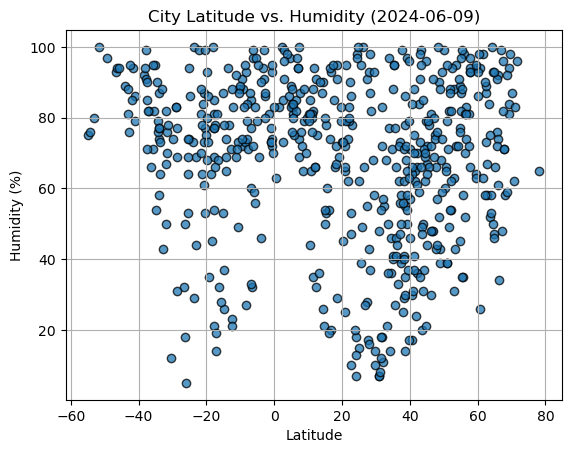

In [17]:
# Build the scatter plots for latitude vs. humidity
latitude_values = city_data_df["Lat"]
humidity_values = city_data_df["Humidity"]
Fig2 = plt.scatter(latitude_values, humidity_values, edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Cloudiness

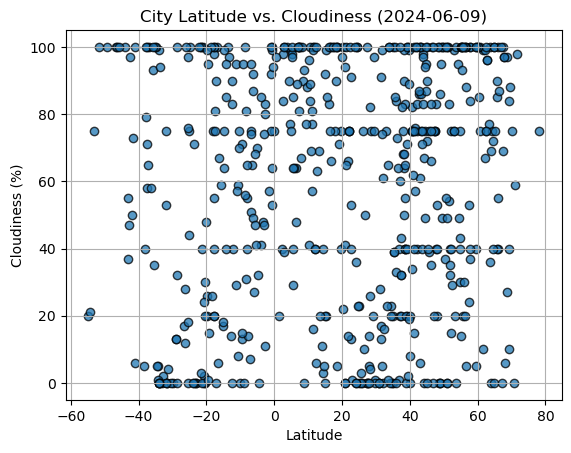

In [19]:
# Build the scatter plots for latitude vs. cloudiness
latitude_values = city_data_df["Lat"]
cloudiness_values = city_data_df["Cloudiness"]
Fig3 = plt.scatter(latitude_values, cloudiness_values, edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

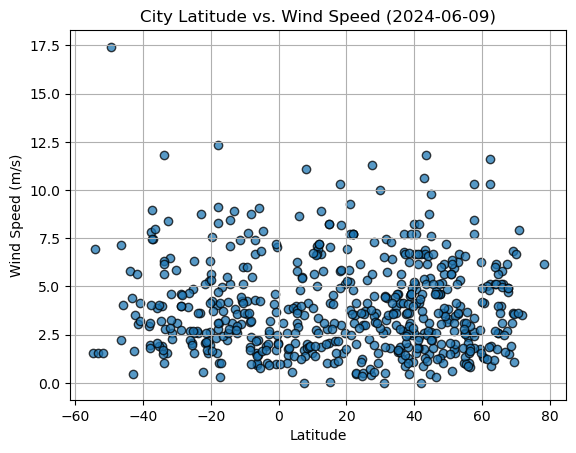

In [20]:
# Build the scatter plots for latitude vs. wind speed
latitude_values = city_data_df["Lat"]
wind_values = city_data_df["Wind Speed"]
Fig4 = plt.scatter(latitude_values, wind_values, edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [27]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, title, x_label, y_label, text_coord):

    # Calculate values for linear regression equation
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate y-values for the linear regression line
    regress_values = x_values * slope + intercept

    # Formulate the linear regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot including the linear regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Add text annotation for line equation
    plt.annotate(line_eq, text_coord, fontsize=15, color='red')

    # Add chart title and labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print the r-value
    print(f"The r-value is: {r_value}")

    # Show the chart
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,albany,42.6001,-73.9662,19.46,84,86,0.89,US,1717954645
5,pyu,18.4833,96.4333,25.55,95,100,2.98,MM,1717955226
8,bani walid,31.7566,13.9942,33.84,18,5,7.47,LY,1717955226
16,yellowknife,62.4560,-114.3525,12.29,73,75,5.14,CA,1717955227
17,iqaluit,63.7506,-68.5145,4.85,52,100,5.14,CA,1717955227


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,1.79,75,20,1.54,AR,1717955224
2,punta arenas,-53.1500,-70.9167,2.06,80,75,1.54,CL,1717955149
3,port moresby,-9.4431,147.1797,24.29,91,13,4.26,PG,1717955226
4,cannonvale,-20.2833,148.7000,18.66,77,0,2.65,AU,1717955226
6,kainantu,-6.2887,145.8655,15.26,97,92,0.94,PG,1717955226


In [25]:
# Show record count for cities in Southern Hemispehere
southern_hemi_df.count()

City          181
Lat           181
Lng           181
Max Temp      181
Humidity      181
Cloudiness    181
Wind Speed    181
Country       181
Date          181
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7481078565552998


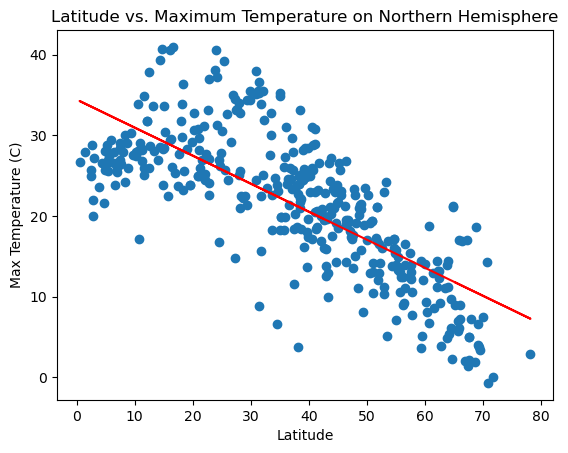

In [29]:
# Linear regression on Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function to plot the linear regression
Fig5 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Maximum Temperature on Northern Hemisphere",
                              "Latitude",
                              "Max Temperature (C)",
                              (5,-35))

The r-value is: 0.7425660136078432


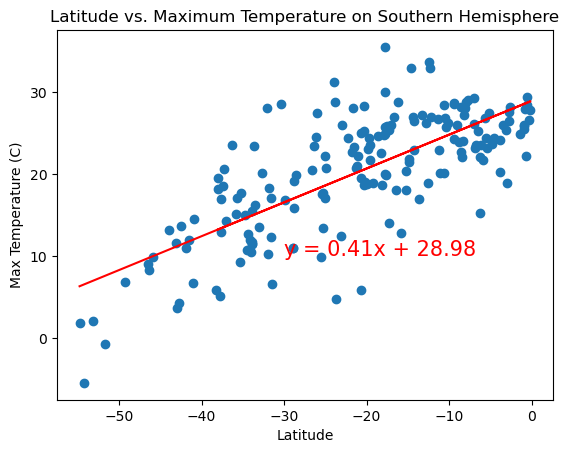

In [28]:
# Linear regression on Southern Hemisphere

# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function to plot the linear regression
Fig6 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Maximum Temperature on Southern Hemisphere",
                              "Latitude",
                              "Max Temperature (C)",
                              (-30,10))

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.015631991684999992


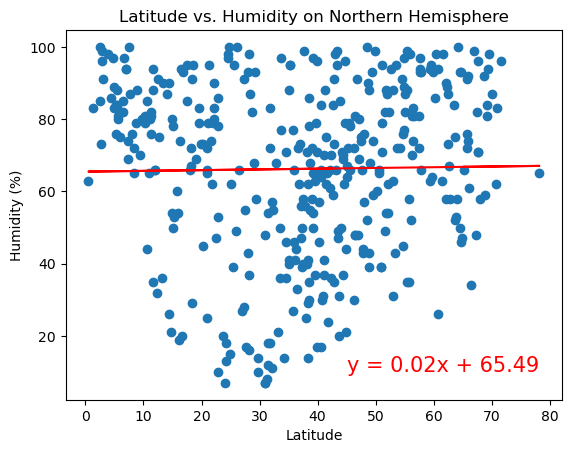

In [30]:
# Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function to plot the linear regression
Fig7 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Humidity on Northern Hemisphere",
                              "Latitude",
                              "Humidity (%)",
                              (45,10))

The r-value is: -0.09415875949821449


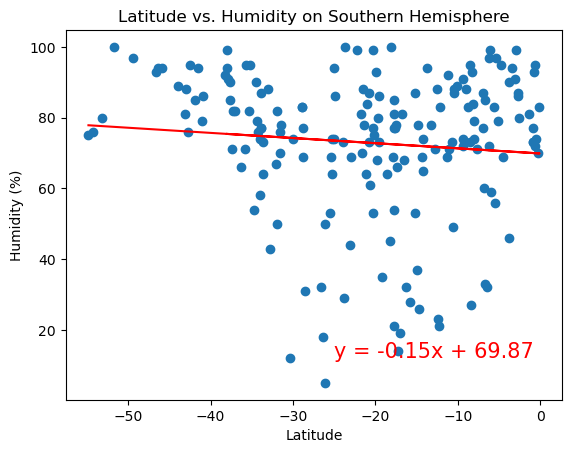

In [31]:
# Southern Hemisphere
# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function to plot the linear regression
Fig8 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Humidity on Southern Hemisphere",
                              "Latitude",
                              "Humidity (%)",
                              (-25,12))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.006797814824636082


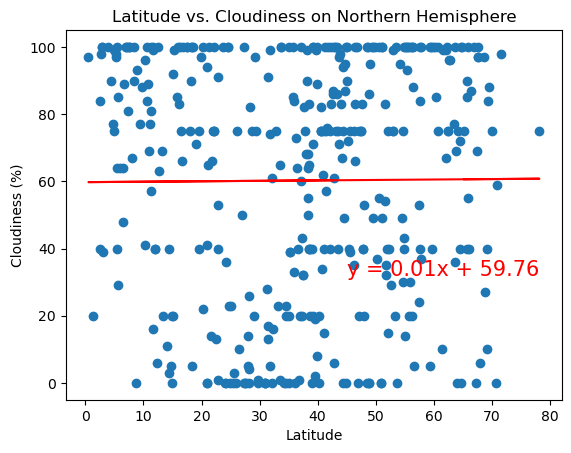

In [32]:
# Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
Fig9 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Cloudiness on Northern Hemisphere",
                              "Latitude",
                              "Cloudiness (%)",
                              (45,32))

The r-value is: 0.05922531553090156


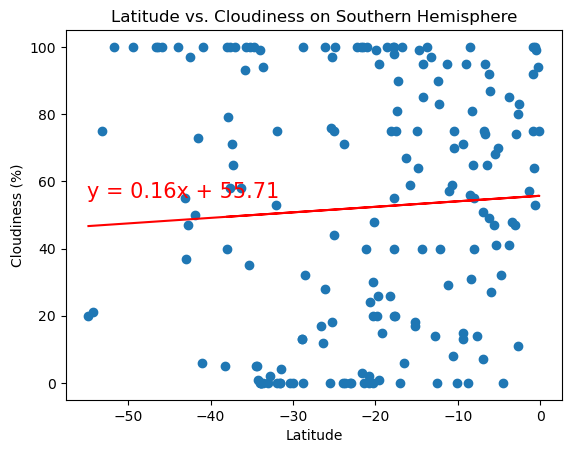

In [33]:
# Southern Hemisphere

# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
Fig10 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Cloudiness on Southern Hemisphere",
                              "Latitude",
                              "Cloudiness (%)",
                              (-55,55))

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015217645765825074


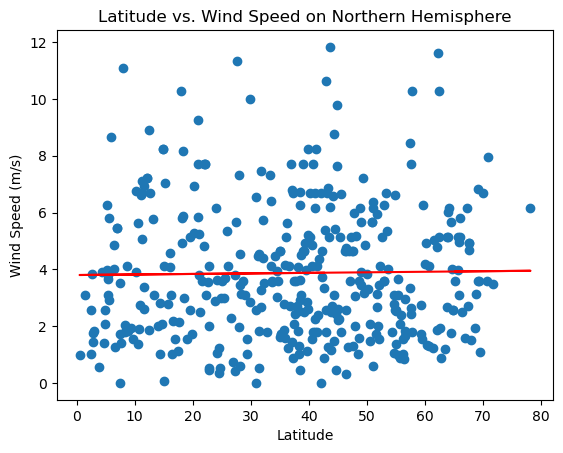

In [35]:
# Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function to plot the linear regression
Fig11 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Wind Speed on Northern Hemisphere",
                              "Latitude",
                              "Wind Speed (m/s)",
                              (10,15))

The r-value is: -0.10832535881478894


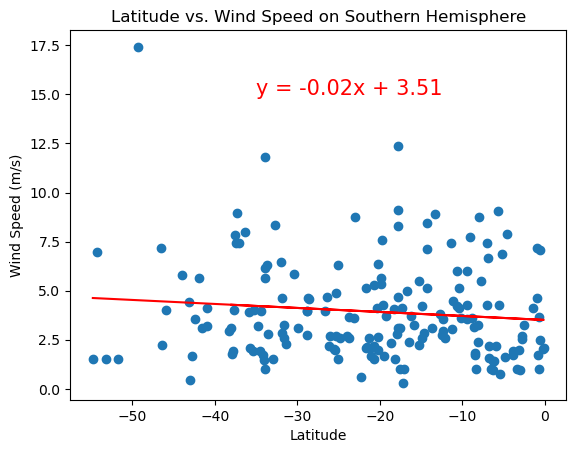

In [36]:
# Southern Hemisphere

# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function to plot the linear regression
Fig12 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Wind Speed on Southern Hemisphere",
                              "Latitude",
                              "Wind Speed (m/s)",
                              (-35,15))